<a href="https://colab.research.google.com/github/JAPreP/Sistema-de-Registro-/blob/main/Desafio1_JulianPreciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [14]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [15]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



## Cálculo del Ingreso total por cada tienda

In [16]:
# Realizaremos la primera peticion del cliente respecto al ingreso total  por cada tienda

ingreso_tienda_1 = tienda['Precio'].sum()
ingreso_tienda_2 = tienda2['Precio'].sum()
ingreso_tienda_3 = tienda3['Precio'].sum()
ingreso_tienda_4 = tienda4['Precio'].sum()


In [17]:
# Ahora construyamos un dataframe para visualizar los datos de forma ordenada

ingresos = {
    'Tienda 1': ingreso_tienda_1,
    'Tienda 2': ingreso_tienda_2,
    'Tienda 3': ingreso_tienda_3,
    'Tienda 4': ingreso_tienda_4
}

df_ingresos = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])
df_ingresos

,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


# 2. Ventas por categoría

## calcular la cantidad de productos vendidos por categoría en cada tienda

In [18]:
# Calcular cantidad de ventas por categoría en cada tienda

ventas_t1 = tienda.groupby('Categoría del Producto').size()
ventas_t2 = tienda2.groupby('Categoría del Producto').size()
ventas_t3 = tienda3.groupby('Categoría del Producto').size()
ventas_t4 = tienda4.groupby('Categoría del Producto').size()



In [19]:
# Unimos los resultados en un solo DataFrame para comparación
df_categorias = pd.concat(
    [ventas_t1, ventas_t2, ventas_t3, ventas_t4],
    axis=1
)

# Se asignan nombres a las columnas
df_categorias.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Reemplazar valores NaN por 0 (categorías no vendidas en alguna tienda)
df_categorias = df_categorias.fillna(0).astype(int)

# Mostrar el DataFrame final
df_categorias

# categorias mas populares  sin afectar el DataFrame original
resumen_popular = pd.DataFrame({
    'Categoría más popular': df_categorias.idxmax(),
    'Cantidad de ventas': df_categorias.max()
})

display(df_categorias)
display(resumen_popular)


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


,Categoría más popular,Cantidad de ventas
Tienda 1,Muebles,465
Tienda 2,Muebles,442
Tienda 3,Muebles,499
Tienda 4,Muebles,480


# 3. Calificación promedio de la tienda


In [20]:
# Para el Calculo de la calificación promedio de los clientes en cada tienda
# creamos la variable con la data de cada tienda

promedio_calificacion_t1 = tienda['Calificación'].mean()
promedio_calificacion_t2 = tienda2['Calificación'].mean()
promedio_calificacion_t3 = tienda3['Calificación'].mean()
promedio_calificacion_t4 = tienda4['Calificación'].mean()


# LUego mediante un un DataFrame con las calificaciones promedio por tienda
# Para su visualización


df_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [
        promedio_calificacion_t1,
        promedio_calificacion_t2,
        promedio_calificacion_t3,
        promedio_calificacion_t4
    ]
})

# Mostrar el DataFrame
df_calificaciones




,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

## Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualizando los resultados


 Tienda 1
Productos MÁS vendidos:


,0
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56


Productos MENOS vendidos:


,0
Producto,
Mochila,39
Pandereta,36
Olla de presión,35
Celular ABXY,33
Auriculares con micrófono,33


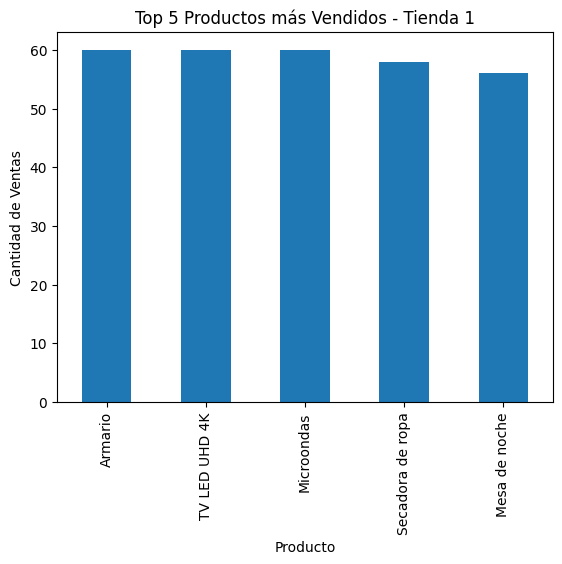


 Tienda 2
Productos MÁS vendidos:


,0
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58


Productos MENOS vendidos:


,0
Producto,
Auriculares,37
Sillón,35
Impresora,34
Mesa de comedor,34
Juego de mesa,32


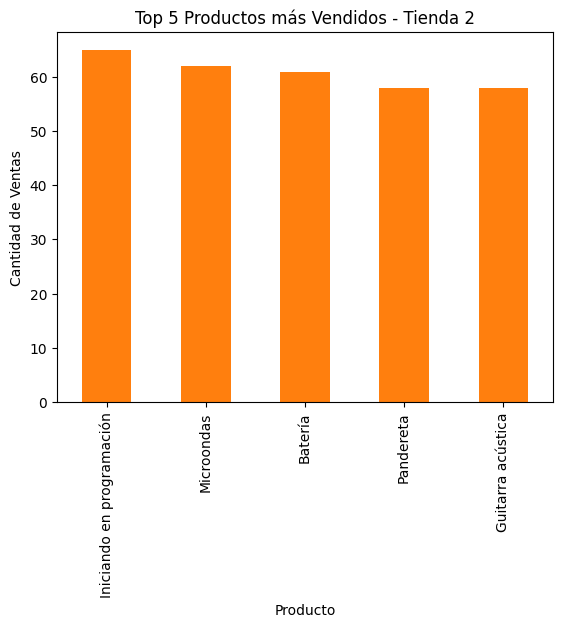


 Tienda 3
Productos MÁS vendidos:


,0
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


Productos MENOS vendidos:


,0
Producto,
Guitarra eléctrica,38
Mochila,36
Microondas,36
Set de vasos,36
Bloques de construcción,35


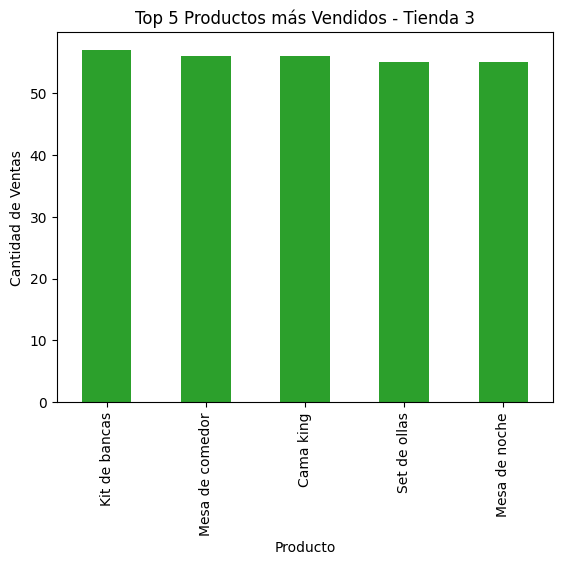


 Tienda 4
Productos MÁS vendidos:


,0
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55


Productos MENOS vendidos:


,0
Producto,
Ciencia de datos con Python,38
Refrigerador,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


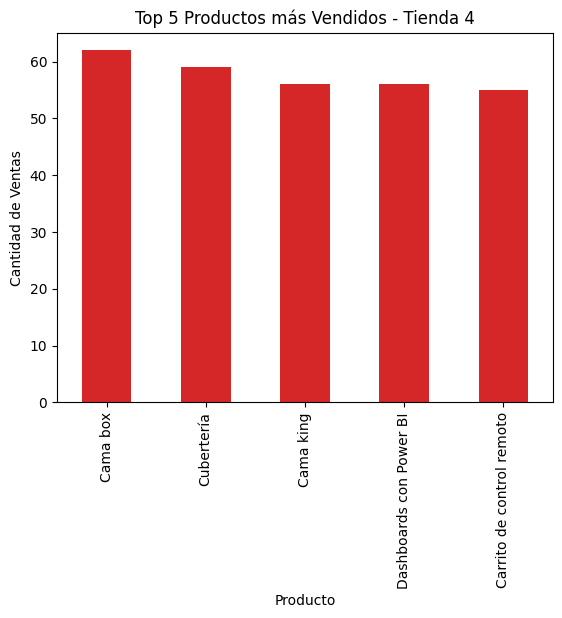

In [21]:
import matplotlib.pyplot as plt

# Diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Colores asignados a cada tienda
colores = {
    'Tienda 1': 'tab:blue',
    'Tienda 2': 'tab:orange',
    'Tienda 3': 'tab:green',
    'Tienda 4': 'tab:red'
}

# Recorrer cada tienda
for nombre_tienda, df in tiendas.items():

    # Contar cuántas veces se vendió cada producto
    ventas_producto = (
        df
        .groupby('Producto')
        .size()
        .sort_values(ascending=False)
    )

    # Obtener los 5 productos más vendidos
    top_productos = ventas_producto.head(5)

    # Obtener los 5 productos menos vendidos
    bottom_productos = ventas_producto.tail(5)

    # Mostrar resultados en texto
    print(f"\n {nombre_tienda}")
    print("Productos MÁS vendidos:")
    display(top_productos)

    print("Productos MENOS vendidos:")
    display(bottom_productos)

    # Crear gráfico de barras con color específico por tienda
    top_productos.plot(
        kind='bar',
        color=colores[nombre_tienda],
        title=f'Top 5 Productos más Vendidos - {nombre_tienda}'
    )

    # Etiquetas del gráfico
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')

    # Mostrar el gráfico
    plt.show()



# 5. Envío promedio por tienda

In [22]:
# Nos valemos nuevamente del Diccionario con los DataFrames de cada tienda
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Lista para almacenar los resultados
costos_envio = []

# Recorrer cada tienda y calcular el costo de envío promedio
for nombre_tienda, df in tiendas.items():

    # Calcular el costo de envío promedio de la tienda
    costo_promedio = df['Costo de envío'].mean()

    # Guardar el resultado
    costos_envio.append({
        'Tienda': nombre_tienda,
        'Costo de Envío Promedio': costo_promedio
    })

# Crear un DataFrame con los resultados finales
df_envio_promedio = pd.DataFrame(costos_envio)

# Mostrar el DataFrame
df_envio_promedio


,Tienda,Costo de Envío Promedio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


# 6. Visualizaciones

## Grafico 1 Pie Chart

### Distribuccion de Facturacion por Tienda

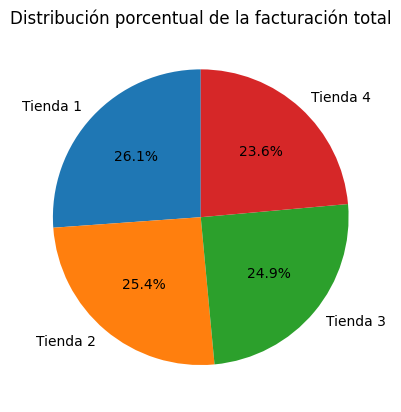

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Desactivar notación científica
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.use_mathtext'] = False


# Facturación total por tienda
facturacion = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

plt.figure()
plt.pie(
    facturacion.values(),
    labels=facturacion.keys(),
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución porcentual de la facturación total')
plt.show()




### Gráfico 2  LIneas

## Evolucion de Ventas en el Tiempo

In [24]:
# Agrupar ventas por mes
ventas_mensuales = pd.DataFrame({
    'Tienda 1': tienda.groupby(tienda['Fecha de Compra'].dt.to_period('M')).size(),
    'Tienda 2': tienda2.groupby(tienda2['Fecha de Compra'].dt.to_period('M')).size(),
    'Tienda 3': tienda3.groupby(tienda3['Fecha de Compra'].dt.to_period('M')).size(),
    'Tienda 4': tienda4.groupby(tienda4['Fecha de Compra'].dt.to_period('M')).size()
}).fillna(0)

# Convertir Period a datetime para graficar
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

plt.figure()
ventas_mensuales.plot()
plt.title('Evolución mensual de ventas por tienda')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.show()



AttributeError: Can only use .dt accessor with datetimelike values

## Grafico 3 Dispersion

## Relacion del Precio vs la Calificacion

In [ ]:
plt.figure()

plt.scatter(tienda['Precio'], tienda['Calificación'], label='Tienda 1', alpha=0.6)
plt.scatter(tienda2['Precio'], tienda2['Calificación'], label='Tienda 2', alpha=0.6)
plt.scatter(tienda3['Precio'], tienda3['Calificación'], label='Tienda 3', alpha=0.6)
plt.scatter(tienda4['Precio'], tienda4['Calificación'], label='Tienda 4', alpha=0.6)

plt.title('Relación entre precio y calificación')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Diccionario con los DataFrames de cada tienda
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Crear una figura grande para 4 gráficos
plt.figure(figsize=(12, 10))

# Colores distintos por tienda
colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Iterar por tienda
for i, (nombre, df) in enumerate(tiendas.items(), 1):

    # Contar ventas por producto y tomar el top 5
    top_productos = df['Producto'].value_counts().head(5)

    # Subgráfico
    plt.subplot(2, 2, i)
    top_productos.sort_values().plot(
        kind='barh',
        color=colores[i-1]
    )

    plt.title(f'{nombre} – Top 5 productos más vendidos')
    plt.xlabel('Cantidad de ventas')
    plt.ylabel('Producto')

plt.tight_layout()
plt.show()


# Analisis de Desempeño Geográfico

## Gráfico de Dispersion Geografica

In [ ]:
import matplotlib.pyplot as plt

# Diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}


plt.figure(figsize=(10, 8))

# Colores por tienda
colores = {
    'Tienda 1': 'blue',
    'Tienda 2': 'orange',
    'Tienda 3': 'green',
    'Tienda 4': 'red'
}

# Graficar cada tienda
for nombre, df in tiendas.items():
    plt.scatter(
        df['lon'],
        df['lat'],
        alpha=0.4,
        label=nombre,
        color=colores[nombre]
    )

plt.title('Distribución geográfica de las ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()
